A regression problem with 14 features given by kaggle as a competition.

In [1]:
# linear algebra

import numpy as np

# data processing, CSV file I/O (e.g. pd.read_csv)

import pandas as pd

# graphs

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# time module

import time

# cross validation

from sklearn.model_selection import cross_validate

# import the regressor

from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Import and check the data

In [2]:
# import the training data

train = pd.read_csv('train.csv')

train.head()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
0,1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
1,3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
2,4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
3,5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
4,8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046


In [3]:
# import the test data

test = pd.read_csv('test.csv')

test.head()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0,0.353600,0.738780,0.600939,0.293377,0.285691,0.458006,0.620704,0.422249,0.369203,0.435727,0.550540,0.699134,0.286864,0.364515
1,2,0.907222,0.189756,0.215531,0.869915,0.301333,0.528958,0.390351,0.521112,0.794779,0.798580,0.446475,0.449037,0.916964,0.513002
2,6,0.179287,0.355353,0.623972,0.437812,0.282476,0.320826,0.386789,0.776422,0.222268,0.229102,0.211913,0.222651,0.327164,0.827941
3,7,0.359385,0.181049,0.551368,0.206386,0.280763,0.482076,0.506677,0.362793,0.379737,0.345686,0.445276,0.518485,0.299028,0.598166
4,10,0.335791,0.682607,0.676481,0.219465,0.282861,0.581721,0.748639,0.350158,0.448915,0.506878,0.817721,0.805895,0.790591,0.249275


In [4]:
# import sample submission

sample = pd.read_csv('sample_submission.csv')

sample.head()

,id,target
0,0,0.5
1,2,0.5
2,6,0.5
3,7,0.5
4,10,0.5


In [5]:
# look at the shape of the data

print('The shape of the train data is: {}'.format(train.shape))
print('The shape of the test data is: {}'.format(test.shape))

The shape of the train data is: (300000, 16)
The shape of the test data is: (200000, 15)


In [6]:
# check for any missing entries

print(train.isnull().sum())
print(test.isnull().sum())

id        0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
cont11    0
cont12    0
cont13    0
cont14    0
target    0
dtype: int64
id        0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
cont11    0
cont12    0
cont13    0
cont14    0
dtype: int64


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

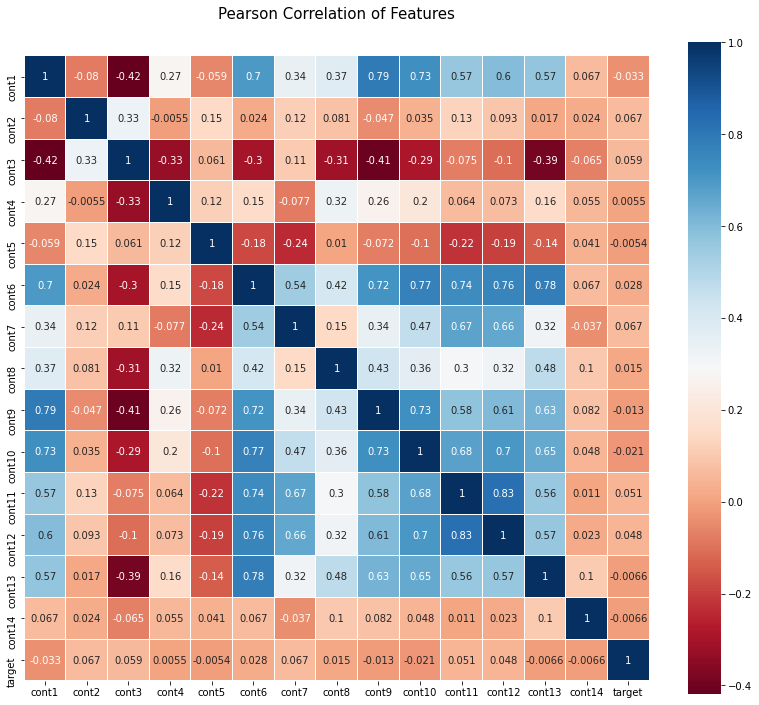

In [7]:
# check the Pearson correlation matrix for strongly correlated features

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.iloc[:,1:].astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)


Since this is a regression problem, highly correlated features such as cont11 and cont12 should not be a problem and so will be left as they are.

# Defining the model

In [8]:
# format the data appropriately

y = train['target']
X = train.iloc[:,1:15]
X_unknown = test.iloc[:,1:] # usually labeled as X_test

In [9]:
begin = time.time()

# import cross validation

from sklearn.model_selection import cross_validate

# import the regressor

from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor


# define the regressor

gbm = XGBRegressor(random_state=22,
                   n_estimators=3000,
                   learning_rate=0.05,
                   subsample=0.9,
                   colsample_bytree=0.9,
                   min_child_weight=3,
                   n_jobs=-1)

gbm.fit(X, y)

# make predictions

scores = cross_validate(gbm, X, y, cv=3, scoring='neg_mean_squared_error', return_train_score=True)

print('Total time was ' + str((time.time() - begin)/60) + ' minutes')

print(-scores['train_score'])
print(np.sqrt(-scores['train_score']))

Total time was 82.87981870571772 minutes
[0.34052478 0.34177472 0.34220361]
[0.58354501 0.58461502 0.58498171]
